# Train

In [3]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as snsb
import plotly.express as px

In [6]:
# Data
train=pd.read_csv('train.csv',index_col=0)
train.head()

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
id                                                                       
0             525.0               0.0              0.0           186.0   
1             143.0             169.0            143.0           191.0   
2             289.0             134.7              0.0           185.7   
3             304.0              76.0              0.0           228.0   
4             157.0             236.0              0.0           192.0   

    SuperplasticizerComponent  CoarseAggregateComponent  \
id                                                        
0                         0.0                    1125.0   
1                         8.0                     967.0   
2                         0.0                    1075.0   
3                         0.0                     932.0   
4                         0.0                     935.4   

    FineAggregateComponent  AgeInDays  Strength  
id                                               
0                    613.0          3     10.38  
1                    643.0         28     23.52  
2                    795.3         28     36.96  
3                    670.0        365     39.05  
4                    781.2         90     74.19

In [12]:
# Shape and info
print('Shape: ',train.shape)
train.info()

Shape:  (5407, 9)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5407 entries, 0 to 5406
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            5407 non-null   float64
 1   BlastFurnaceSlag           5407 non-null   float64
 2   FlyAshComponent            5407 non-null   float64
 3   WaterComponent             5407 non-null   float64
 4   SuperplasticizerComponent  5407 non-null   float64
 5   CoarseAggregateComponent   5407 non-null   float64
 6   FineAggregateComponent     5407 non-null   float64
 7   AgeInDays                  5407 non-null   int64  
 8   Strength                   5407 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 422.4 KB


In [13]:
# Stats
train.describe()

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
count      5407.000000       5407.000000      5407.000000     5407.000000   
mean        299.168189         58.610579        31.872795      185.076235   
std         105.537682         83.417801        54.605003       18.517583   
min         102.000000          0.000000         0.000000      121.800000   
25%         213.700000          0.000000         0.000000      175.100000   
50%         297.200000          0.000000         0.000000      187.400000   
75%         375.000000        122.600000        79.000000      192.000000   
max         540.000000        359.400000       200.100000      247.000000   

       SuperplasticizerComponent  CoarseAggregateComponent  \
count                5407.000000               5407.000000   
mean                    4.108441                992.000718   
std                     5.692296                 77.148010   
min                     0.000000                801.000000   
25%                     0.000000                938.200000   
50%                     0.000000                978.000000   
75%                     8.050000               1047.000000   
max                    32.200000               1145.000000   

       FineAggregateComponent    AgeInDays     Strength  
count             5407.000000  5407.000000  5407.000000  
mean               771.219974    51.751618    35.452071  
std                 78.725253    70.006975    16.401896  
min                594.000000     1.000000     2.330000  
25%                734.300000     7.000000    23.640000  
50%                781.200000    28.000000    33.950000  
75%                821.000000    56.000000    45.850000  
max                992.600000   365.000000    82.600000

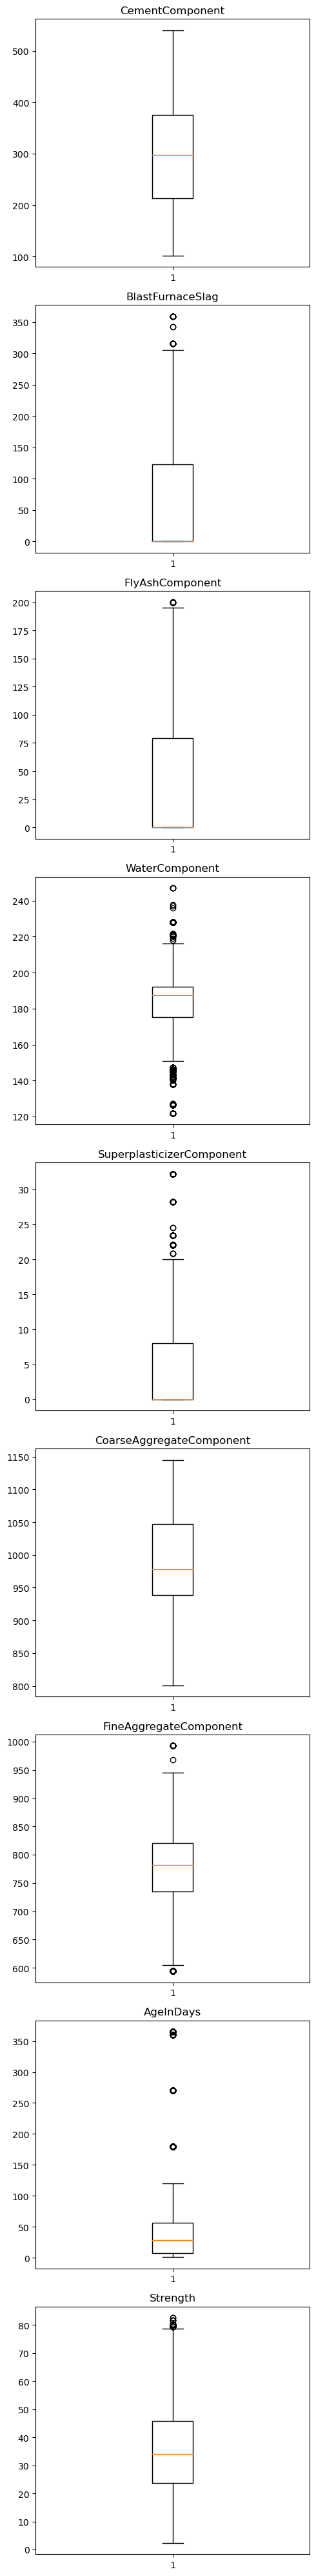

In [85]:
# FInding extereme Values
fliers={}
c=1
plt.figure(figsize=(5,40))

for i in train.columns:
    plt.subplot(9,1,c)
    c+=1
    box=plt.boxplot(train[i])
    plt.title(i)
    fliers[i]=[i.get_ydata() for i in box['fliers']]
    

plt.tight_layout()
plt.show()

In [125]:
count={}
for i in fliers.keys():
    count[i]=(len(fliers[i][0])/len(train[i]))*100
print(count)

{'CementComponent': 0.0, 'BlastFurnaceSlag': 0.3883854262992417, 'FlyAshComponent': 0.0924727205474385, 'WaterComponent': 8.93286480488256, 'SuperplasticizerComponent': 1.3870908082115776, 'CoarseAggregateComponent': 0.0, 'FineAggregateComponent': 2.8296652487516183, 'AgeInDays': 8.636952099130756, 'Strength': 0.6103199556130942}


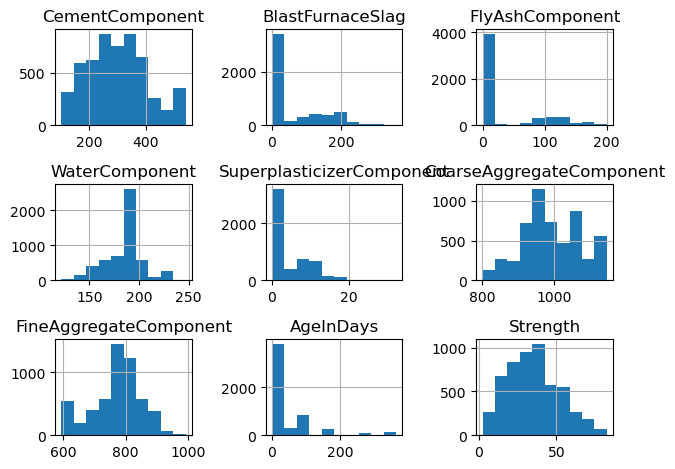

In [33]:
train.hist()
plt.tight_layout()
plt.show()

In [34]:
train.skew()

CementComponent              0.341278
BlastFurnaceSlag             1.121204
FlyAshComponent              1.304692
WaterComponent              -0.215282
SuperplasticizerComponent    1.411689
CoarseAggregateComponent    -0.081453
FineAggregateComponent      -0.447378
AgeInDays                    2.746870
Strength                     0.380732
dtype: float64

In [35]:
train.kurtosis()

CementComponent             -0.546574
BlastFurnaceSlag             0.004654
FlyAshComponent              0.096250
WaterComponent               0.837698
SuperplasticizerComponent    2.200681
CoarseAggregateComponent    -0.560611
FineAggregateComponent      -0.007122
AgeInDays                    8.274822
Strength                    -0.356449
dtype: float64

>Pathetic Shape

In [38]:
from pandas_profiling import ProfileReport
profile=ProfileReport(train)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Test

In [42]:
test=pd.read_csv('test.csv',index_col=0)

In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3605 entries, 5407 to 9011
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            3605 non-null   float64
 1   BlastFurnaceSlag           3605 non-null   float64
 2   FlyAshComponent            3605 non-null   float64
 3   WaterComponent             3605 non-null   float64
 4   SuperplasticizerComponent  3605 non-null   float64
 5   CoarseAggregateComponent   3605 non-null   float64
 6   FineAggregateComponent     3605 non-null   float64
 7   AgeInDays                  3605 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 253.5 KB


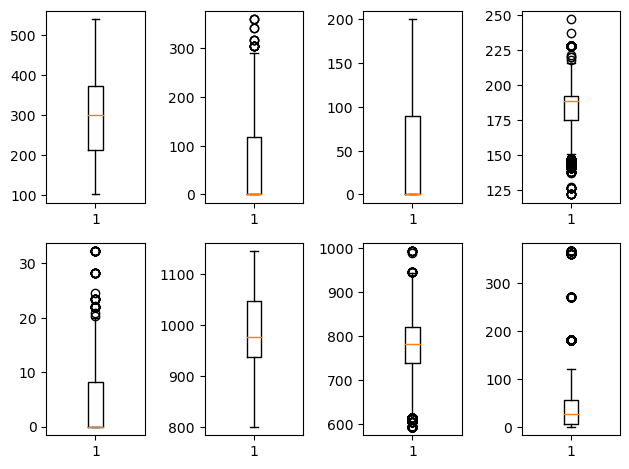

In [70]:
c=1
fliers={}
for i in test.columns:
    plt.subplot(2,4,c)
    c+=1
    box=plt.boxplot(test[i])
    fliers[i]=[i.get_ydata() for i in box['fliers']]

plt.tight_layout()
plt.show()

In [119]:
count={}
for i in fliers.keys():
    count[i]=len(fliers[i][0]) 
print(count)

{'CementComponent': 0, 'BlastFurnaceSlag': 21, 'FlyAshComponent': 5, 'WaterComponent': 483, 'SuperplasticizerComponent': 75, 'CoarseAggregateComponent': 0, 'FineAggregateComponent': 153, 'AgeInDays': 467, 'Strength': 33}


In [120]:
count={}
for i in fliers.keys():
    count[i]=len(fliers[i][0])/len(train[i])*100
print(count)

{'CementComponent': 0.0, 'BlastFurnaceSlag': 0.3883854262992417, 'FlyAshComponent': 0.0924727205474385, 'WaterComponent': 8.93286480488256, 'SuperplasticizerComponent': 1.3870908082115776, 'CoarseAggregateComponent': 0.0, 'FineAggregateComponent': 2.8296652487516183, 'AgeInDays': 8.636952099130756, 'Strength': 0.6103199556130942}


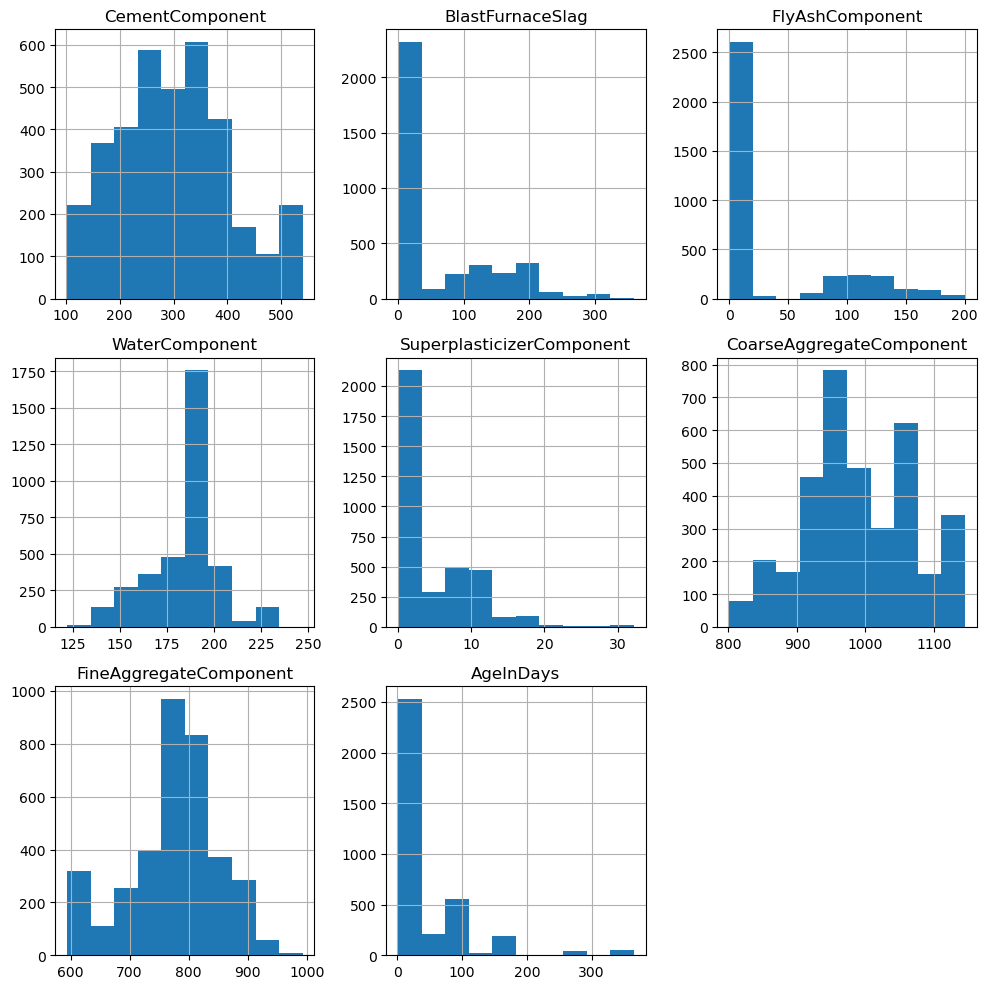

In [75]:
test.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [77]:
train.skew()

CementComponent              0.341278
BlastFurnaceSlag             1.121204
FlyAshComponent              1.304692
WaterComponent              -0.215282
SuperplasticizerComponent    1.411689
CoarseAggregateComponent    -0.081453
FineAggregateComponent      -0.447378
AgeInDays                    2.746870
Strength                     0.380732
dtype: float64

In [76]:
test.skew()

CementComponent              0.321378
BlastFurnaceSlag             1.155207
FlyAshComponent              1.277012
WaterComponent              -0.337090
SuperplasticizerComponent    1.474013
CoarseAggregateComponent    -0.091104
FineAggregateComponent      -0.428945
AgeInDays                    2.732880
dtype: float64

Model

In [126]:
train.columns

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [127]:
X,Y=train.iloc[:,:-1],train.Strength

In [156]:
# from sklearn.preprocessing import StandardScaler

# scaler=StandardScaler()


In [133]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20)

In [136]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [139]:
pred=lr.predict(x_test)

In [141]:
np.sqrt(mean_squared_error(y_test,pred))

14.32488784123972

In [158]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb=XGBRegressor()

In [ ]:
# define hyperparameters to tune
parameters = {'nthread':[4], # number of threads to use for parallel processing
              'objective':['reg:linear'], # objective function for regression
              'learning_rate': [0.05, 0.1, 0.15], # learning rate for gradient descent
              'max_depth': [5, 6, 7], # maximum depth of the decision trees
              'min_child_weight': [1, 2, 3], # minimum sum of instance weight needed in a child
              'silent': [1], # whether to print messages during training
              'subsample': [0.7, 0.8, 0.9], # subsample ratio of the training instances
              'colsample_bytree': [0.7, 0.8, 0.9], # subsample ratio of columns when constructing each tree
              'n_estimators': [100, 200, 300] # number of trees to build
              }

# create grid search object
grid_search = GridSearchCV(estimator=xgb, param_grid=parameters, cv=10, n_jobs=-1)

# fit grid search object to the data
grid_search.fit(X, Y)

# print best hyperparameters
print(grid_search.best_params_)

In [143]:
pred=xgb.fit(x_train,y_train).predict(x_test)
pred

array([14.523336, 19.995325, 25.154604, ..., 38.905895, 40.659893,
       55.812588], dtype=float32)

In [144]:
np.sqrt(mean_squared_error(y_test,pred))

12.632010900302289

In [145]:
final_pred=xgb.predict(test)

In [153]:
final_df=pd.DataFrame()

In [154]:
final_df['id']=test.index
final_df['Strength']=final_pred
final_df

id   Strength
0     5407  45.714100
1     5408  19.763927
2     5409  32.233475
3     5410  48.312969
4     5411  38.421463
...    ...        ...
3600  9007  33.587761
3601  9008  35.344891
3602  9009  52.032906
3603  9010  37.392017
3604  9011  22.304108

[3605 rows x 2 columns]

In [155]:
final_df.to_csv('submission.csv',index=False)